# Linear Regression with Mutiple Variables

### First we need some data. House Prices. https://www.kaggle.com/datasets/harlfoxem/housesalesprediction?resource=download 

### This dataset contains house sale prices for King County, which includes Seattle. 
### It includes homes sold between May 2014 and May 2015.
 

In [1]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
dataset = pd.read_csv('kc_house_data.csv')
#to see slice of data at the top
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
#checking if any value is missing
print(dataset.isnull().any())

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool


In [3]:
#checking for categorical data
print(dataset.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
#dropping the id and date column
dataset = dataset.drop(['id','date'], axis = 1)

In [5]:
TRows,TCols = dataset.shape
[TRows,TCols]

[21613, 19]

#### Pairplots
https://seaborn.pydata.org/generated/seaborn.pairplot.html 
Pairplots create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.
Assigning a hue variable adds a semantic mapping and changes the default marginal plot to a layered kernel density estimate (KDE)

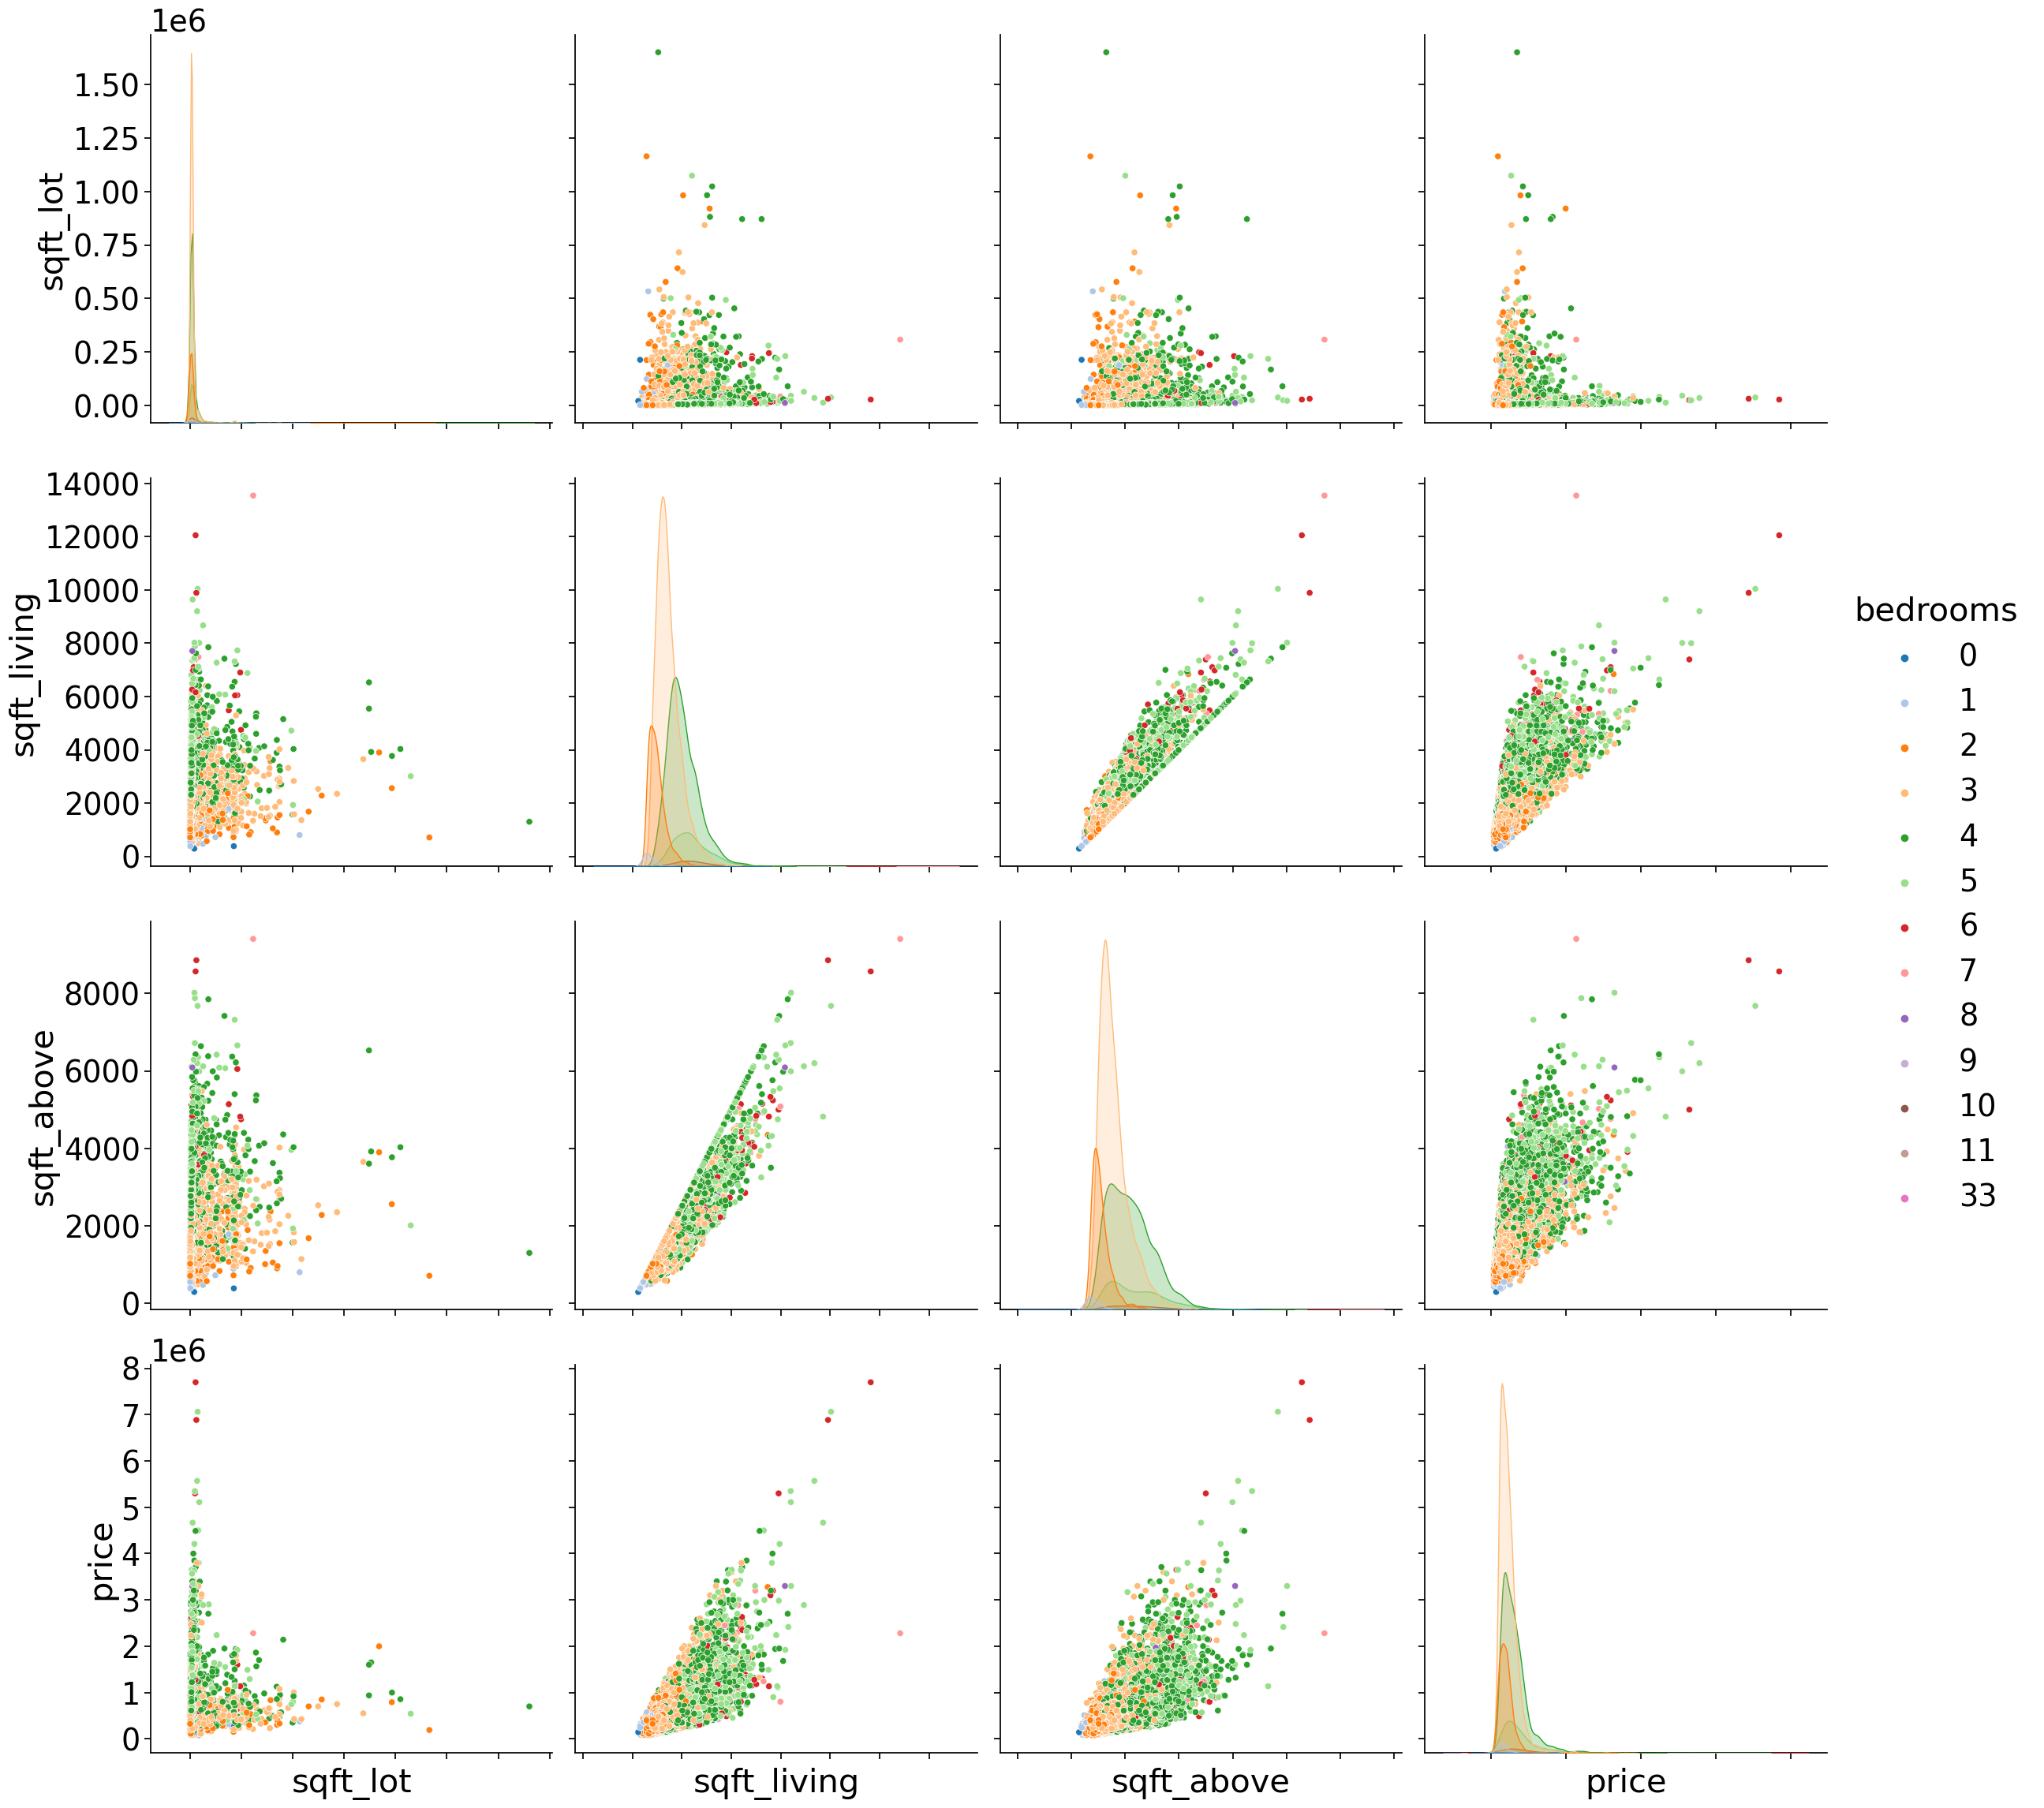

In [6]:
#understanding the distribution with seaborn
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['sqft_lot','sqft_living','sqft_above','price','bedrooms']], 
                 hue='bedrooms', palette='tab20',height=6)
g.set(xticklabels=[]);

In [7]:
#separating independent and dependent variable
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values # price is now first column after dropping 'id' & 'date'
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [8]:
[X_train.shape, X_test.shape, y_train.shape, y_test.shape]

[(14408, 18), (7205, 18), (14408,), (7205,)]

## A. MultiLinear Regression Sklearn Machine Learning Library

In [9]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [10]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n' )
regressor.coef_

Coefficients: 



array([-2.89896991e+04,  3.62138153e+04,  1.00220413e+02,  2.60670123e-01,
        1.20727307e+04,  6.23705375e+05,  5.23954366e+04,  2.83989522e+04,
        9.61484867e+04,  6.32485477e+01,  3.69718650e+01, -2.53247077e+03,
        1.30419682e+01, -5.13069194e+02,  6.08417694e+05, -2.07473774e+05,
        3.36243161e+01, -4.85344013e-01])

In [12]:
print('Coefficients Intercept: %.6f' % regressor.intercept_)
# The mean squared error
print("Mean squared error (Train): %.6f"
      % mean_squared_error(y_train, regressor.predict(X_train)))
print("Mean squared error (Test): %.6f"
      % mean_squared_error(y_test, regressor.predict(X_test)))
# Explained variance score: 1 is perfect prediction
# Variance on Test
print('Variance score: %.6f' % r2_score(y_test, regressor.predict(X_test)))

Coefficients Intercept: 314597.672199
Mean squared error (Train): 38204411816.158409
Mean squared error (Test): 45386603925.516983
Variance score: 0.685558


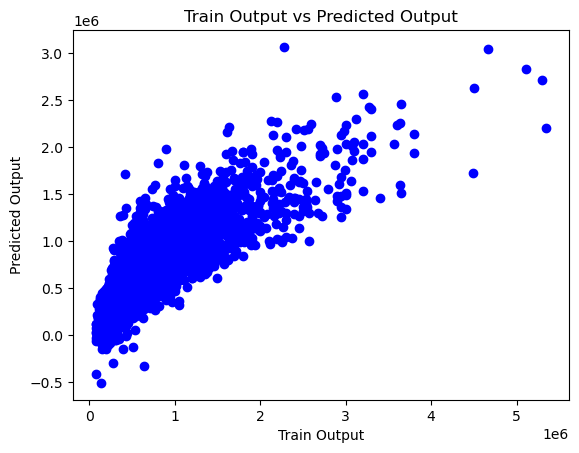

In [13]:
# Visualizing Errors
# Visualising the Training set results
plt.scatter(y_train,regressor.predict(X_train), color = 'blue')
plt.title('Train Output vs Predicted Output')
plt.xlabel('Train Output')
plt.ylabel('Predicted Output')
plt.show()

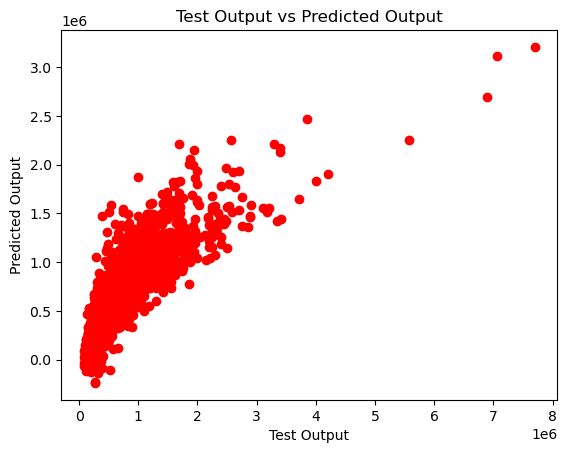

In [14]:
# Visualizing Errors
# Visualising the Test set results
plt.scatter(y_test,y_pred, color = 'red')
plt.title('Test Output vs Predicted Output')
plt.xlabel('Test Output')
plt.ylabel('Predicted Output')
plt.show()

## B. MultiLinear Regression Statsmodels Library
### 1. ALL IN MODEL

NOTE: Emphasis in the supporting features of statsmodels is in analysing the training data which includes hypothesis tests and goodness-of-fit measures, while the emphasis in the supporting infrastructure in scikit-learn is on model selection for out-of-sample prediction and therefore cross-validation on "test data"
    https://stats.stackexchange.com/questions/146804/difference-between-statsmodel-ols-and-scikit-linear-regression

In [15]:
# In statsmodels.api below, you have to add a constant yourself
# Adding the constant term to FULL DATA X
XT = np.append(arr = np.ones((len(X), 1)).astype(int), values = X, axis = 1)
XT.shape

(21613, 19)

In [16]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X_opt = XT[:, [0, 1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18]] # 19 columns of input with Const Col
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:48:36   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.69e+06   2.93e+06      2.282      0.022    9.44e+05    1.24e+07
x1         -3.577e+04   1891.843    -18.906      0.000   -3.95e+04   -3.21e+04
x2          4.114e+04   3253.678     12.645      0.000    3.48e+04    4.75e+04
x3           110.4392      2.270     48.661      0.000     105.991     114.888
x4             0.1286      0.048      2.683      0.007       0.035       0.223
x5          6689.5501   3595.859      1.860      0.063    -358.599    1.37e+04
x6           5.83e+05   1.74e+04     33.580      0.000    5.49e+05    6.17e+05
x7          5.287e+04   2140.055     24.705      0.000    4.87e+04    5.71e+04
x8          2.639e+04   2351.461     11.221      0.000    2.18e+04     3.1e+04
x9          9.589e+04   2152.789     44.542      0.000    9.17e+04       1e+05
x10           70.7889      2.253     31.416      0.000      66.372      75.205
x11           39.6613      2.647     14.985      0.000      34.474      44.849
x12        -2620.2232     72.659    -36.062      0.000   -2762.640   -2477.806
x13           19.8126      3.656      5.420      0.000      12.647      26.978
x14         -582.4199     32.986    -17.657      0.000    -647.074    -517.765
x15         6.027e+05   1.07e+04     56.149      0.000    5.82e+05    6.24e+05
x16        -2.147e+05   1.31e+04    -16.349      0.000    -2.4e+05   -1.89e+05
x17           21.6814      3.448      6.289      0.000      14.924      28.439
x18           -0.3826      0.073     -5.222      0.000      -0.526      -0.239
==============================================================================
Omnibus:                    18384.201   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1868224.491
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      47.985   Cond. No.                     3.57e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.72e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 2. Backward Elimination ##
Eliminate features (columns) that do not explain data well enough <br>
Step 1: Select a Significance Level [p-value = 0.05] to stay in model <br>
Step 2: Fit model with all features <br>
Step 3: Eliminate feature with highest p-value if > 0.05 and refit model otherwise terminate <br>
Step 4: When no feature has p-value > 0.05 preset value Model is Ready <br>

In [17]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X_opt_c = XT[:, [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18]] # Elimiate Const column [See Note Below]
regressor_OLS = sm.OLS(endog = y, exog = X_opt_c).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                        0.00
Time:                        09:48:36   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.551e+04   1888.716    -18.802      0.000   -3.92e+04   -3.18e+04
x2          4.105e+04   3253.759     12.618      0.000    3.47e+04    4.74e+04
x3           110.2642      2.268     48.607      0.000     105.818     114.711
x4             0.1334      0.048      2.786      0.005       0.040       0.227
x5          5261.5471   3541.347      1.486      0.137   -1679.755    1.22e+04
x6          5.833e+05   1.74e+04     33.598      0.000    5.49e+05    6.17e+05
x7          5.236e+04   2128.298     24.600      0.000    4.82e+04    5.65e+04
x8          2.721e+04   2323.818     11.709      0.000    2.27e+04    3.18e+04
x9          9.548e+04   2145.492     44.503      0.000    9.13e+04    9.97e+04
x10           71.3928      2.238     31.902      0.000      67.006      75.779
x11           38.8714      2.624     14.813      0.000      33.728      44.015
x12        -2561.7953     68.006    -37.670      0.000   -2695.092   -2428.498
x13           20.4187      3.646      5.600      0.000      13.272      27.566
x14         -519.0756     17.826    -29.119      0.000    -554.016    -484.136
x15         6.022e+05   1.07e+04     56.106      0.000    5.81e+05    6.23e+05
x16        -2.179e+05   1.31e+04    -16.683      0.000   -2.44e+05   -1.92e+05
x17           23.0994      3.392      6.811      0.000      16.452      29.747
x18           -0.3761      0.073     -5.137      0.000      -0.520      -0.233
==============================================================================
Omnibus:                    18403.146   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1873534.498
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      48.049   Cond. No.                     4.65e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.01e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [18]:
# Building the optimal model using Backward Elimination
import statsmodels.api as sm
X_opt_c = XT[:, [1, 2, 3, 6,7,8,9,10,11,12,13,14,15,16,17]] # Elimiate Const & x5 column
regressor_OLS = sm.OLS(endog = y, exog = X_opt_c).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.469e+04
Date:                Tue, 31 Jan 2023   Prob (F-statistic):                        0.00
Time:                        09:48:36   Log-Likelihood:                     -2.9462e+05
No. Observations:               21613   AIC:                                  5.893e+05
Df Residuals:                   21599   BIC:                                  5.894e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -3.505e+04   1882.015    -18.621      0.000   -3.87e+04   -3.14e+04
x2          4.314e+04   3133.643     13.766      0.000     3.7e+04    4.93e+04
x3           108.9846      2.239     48.686      0.000     104.597     113.372
x4          5.825e+05   1.74e+04     33.537      0.000    5.48e+05    6.17e+05
x5          5.241e+04   2126.168     24.652      0.000    4.82e+04    5.66e+04
x6          2.655e+04   2315.725     11.465      0.000     2.2e+04    3.11e+04
x7          9.624e+04   2133.598     45.105      0.000    9.21e+04       1e+05
x8            71.9815      2.077     34.654      0.000      67.910      76.053
x9            37.0031      2.407     15.373      0.000      32.285      41.721
x10        -2550.7296     67.019    -38.060      0.000   -2682.092   -2419.367
x11           20.3576      3.645      5.585      0.000      13.213      27.502
x12         -533.0454     17.397    -30.641      0.000    -567.144    -498.946
x13         6.062e+05   1.07e+04     56.863      0.000    5.85e+05    6.27e+05
x14        -2.274e+05   1.28e+04    -17.756      0.000   -2.52e+05   -2.02e+05
x15           21.2799      3.349      6.353      0.000      14.715      27.845
==============================================================================
Omnibus:                    18368.217   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1864568.814
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      47.942   Cond. No.                     4.46e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.05e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Let us Automate using code

In [19]:
# Adapted from: https://www.kaggle.com/code/ashishsaxena2209/step-by-step-regression-backward-elimination/notebook

# Automating backward elimination technique

def DoBackwardElimination(the_regressor, X, y, minP2eliminate):
    
    assert np.shape(X)[0] == np.shape(y)[0], 'Length of X and y do not match'
    assert minP2eliminate > 0, 'Minimum P value to eliminate cannot be zero or negative'
    
    original_list = list(range(0, np.shape(the_regressor.pvalues)[0]))
    
    max_p = 10        # Initializing with random value of maximum P value
    i = 0
    r2adjusted = []   # Will store R Square adjusted value for each loop
    r2 = []           # Will store R Square value  for each loop
    list_of_originallist = [] # Will store modified index of X at each loop
    classifiers_list = [] # fitted classifiers at each loop
    
    while max_p >= minP2eliminate:
        
        p_values = list(the_regressor.pvalues)
        r2adjusted.append(the_regressor.rsquared_adj)
        r2.append(the_regressor.rsquared)
        list_of_originallist.append(original_list)
        
        max_p = max(p_values)
        max_p_idx = p_values.index(max_p)
        
        if max_p_idx == 0:
            
            temp_p = set(p_values)
            
            # removing the largest element from temp list
            temp_p.remove(max(temp_p))
            
            max_p = max(temp_p)
            max_p_idx = p_values.index(max_p)
            
            print('Index value 0 found!! Next index value is {}'.format(max_p_idx))
            
            if max_p < minP2eliminate:
                
                print('Max P value found less than 0.1 with 0 index ...Loop Ends!!')
                
                break
                
        if max_p < minP2eliminate:
            
            print('Max P value found less than 0.1 without 0 index...Loop Ends!!')
            
            break
        
        val_at_idx = original_list[max_p_idx]
        
        idx_in_org_lst = original_list.index(val_at_idx)
        
        original_list.remove(val_at_idx)
        
        print('Popped column index out of original array is {} with P-Value {}'.format(val_at_idx, np.round(np.array(p_values)[max_p_idx], decimals= 4)))
        
        X_new = X[:, original_list]
        
        the_regressor = sm.OLS(endog = y, exog = X_new).fit()
        classifiers_list.append(the_regressor)
        
        print('==================================================================================================')
        
    return classifiers_list, r2, r2adjusted, list_of_originallist

In [20]:
# Fitting the regressor
regressor_SLR_OLS = sm.OLS(endog = y, exog = X_opt).fit()

# Looking at the summary of regressor
print(regressor_SLR_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Tue, 31 Jan 2023   Prob (F-statistic):               0.00
Time:                        09:48:36   Log-Likelihood:            -2.9460e+05
No. Observations:               21613   AIC:                         5.892e+05
Df Residuals:                   21595   BIC:                         5.894e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.69e+06   2.93e+06      2.282      0.0

In [21]:
# Now it's time to do backward elimination and check wether it improves performance of our regression model

regressor_list, r2, r2adjusted, list_of_changes = DoBackwardElimination(the_regressor=regressor_SLR_OLS, 
                                                                        X= X_opt, y= y, minP2eliminate = 0.05)

Popped column index out of original array is 5 with P-Value 0.0628
Index value 0 found!! Next index value is 4
Max P value found less than 0.1 with 0 index ...Loop Ends!!


In [22]:
list_of_changes

[[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]]

In [23]:
r2adjusted

[0.6995108242141197, 0.6994765830365461]

In [24]:
r2

[0.6997471890109159, 0.6996990693715182]

#### Note: When is it ok to remove the intercept in a linear regression model?
https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model
The shortest answer: never, unless you are sure that your linear approximation of the data generating process (linear regression model) either by some theoretical or any other reasons is forced to go through the origin. If not the other regression parameters will be biased even if intercept is statistically insignificant (strange but it is so, consult Brooks Introductory Econometrics for instance). By leaving the intercept term you insure that the residual term is zero-mean.
##### This level of detail is beyond the scope of this introductory course